## CRIME INCIDENT REPORTS

- Officers of the Boston Police Department (BPD) prepare crime incident reports to keep track of the early circumstances surrounding an occurrence. consisting of a smaller number of fields aimed for gathering information on an incident's specifics, such as when and where it took place.

<b>Objective</b> - I want to be able to anticipate when crimes will take place based on the kind of offense committed and the Hour of day.

<b>Dataset Description</b>: Dataset had been extracted from the crime incident reports of Boston Police Department "Analyze Boston". This dataset contains the the crimes which are done and they are categorized by the type of offense they are involved in the year 2022 

- Access to Dataset: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/313e56df-6d77-49d2-9c49-ee411f10cf58

<b> Intially The dataset consists of 71721 observations & 17 Columns.


- <b>INCIDENT_NUMBER</b>: Unique NUmber for the each offense recorded 
    

- <b>OFFENSE_CODE</b>: Each Type of Offense has unique code according to the type of Offense 
    

- <b>OFFENSE_CODE_GROUP</b>: In which group of category the offenses are categorized.
    

- <b>OFFENSE_DESCRIPTION</b>: It involves types of offenses they are commited such as {Burgulary, theft, loss of property or an item}
    

- <b>DISTRICT</b>: In which district this offenses were took place and each offense has a unique code. 
    

- <b>REPORTING_AREA</b>: For the better picture of the offense and to diffrentiate from the other areas there diffrent set of areas with a unique number to them.
    

- <b>SHOOTING</b>: If that particular offense included Shooting or not
    

- <b>OCCURRED_ON_DATE</b>: At which date the particular incident took place and this column gives us the time of the incident.
    

- <b>YEAR</b>: In which year all this offense took place Here we are taking year wise data from the Boston Police department for this particular dataset I have taken year 2021 dataset.
    

- <b>MONTH</b>:  In which month of the year the offenses wre took place.
    

- <b>DAY_OF_WEEK</b>: On which days the offenses were took place.
    

- <b>HOUR</b>: At what particular hour of the day the offense are recorded.
    

- <b>UCR_PART</b>: They haven't mentioned anything particular or important related to the dataset with the UCR_PART.
    
    
- <b>STREET</b>: Offenses are recorded in which street of that are area the offense took place.
    

- <b>Lat</b>: Latitude of that particular location.
    
    
- <b>Long</b>: Longitude of that particular location.
    
    
- <b>Location</b>: Which consists of both longitude and latitude coordinates of the location.

<b>Libraries which are used are listed below:</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

- <b>Importing the dataset</b>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vishu3883/DATA_602/main/DATA/Boston_Crime_Data_2021.csv", low_memory=False)
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,PLTEST005,520,NaN,BURGLARY - RESIDENTIAL,B2,289,1,2021-10-13 00:00:00,2021,10,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
1,PLTEST003,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
2,PLTEST002,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
3,PLTEST001,3114,NaN,INVESTIGATE PROPERTY,B2,,0,2021-03-29 00:00:00,2021,3,Monday,0,NaN,SCHROEDER PLAZA,0.000000,0.000000,"(0, 0)"
4,312030979,3201,NaN,PROPERTY - LOST/ MISSING,E13,465,0,2021-03-22 00:00:00,2021,3,Monday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71716,121005808,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B3,289,0,2021-01-19 12:00:00,2021,1,Tuesday,12,NaN,CLARKWOOD ST,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
71717,121000816,3304,NaN,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,NaN,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
71718,120221042,3006,NaN,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,NaN,WASHINGTON ST,42.283902,-71.130863,"(42.283902436483125, -71.13086262643496)"
71719,10637224,3125,NaN,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270,0,2021-01-26 18:54:00,2021,1,Tuesday,18,NaN,NORTHAMPTON ST,42.333951,-71.075389,"(42.333951248393774, -71.07538938822692)"


#### Displaying the number of Rows & Columns of the dataset

In [3]:
print(f'Rows: {df.shape[0]:,}')
print(f'Columns: {df.shape[1]:,}')

Rows: 71,721
Columns: 17


#### Displaying the columns of the dataset 

In [4]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71721 entries, 0 to 71720
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      71721 non-null  object 
 1   OFFENSE_CODE         71721 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null      float64
 3   OFFENSE_DESCRIPTION  71721 non-null  object 
 4   DISTRICT             70728 non-null  object 
 5   REPORTING_AREA       71721 non-null  object 
 6   SHOOTING             71721 non-null  int64  
 7   OCCURRED_ON_DATE     71721 non-null  object 
 8   YEAR                 71721 non-null  int64  
 9   MONTH                71721 non-null  int64  
 10  DAY_OF_WEEK          71721 non-null  object 
 11  HOUR                 71721 non-null  int64  
 12  UCR_PART             0 non-null      float64
 13  STREET               71042 non-null  object 
 14  Lat                  71721 non-null  float64
 15  Long                 71721 non-null 

- We can see that the 'OFFENSE_CODE_GROUP' & 'UCR_PART' are having some intruptted values.

#### DATA CLEANING
- Now checking for the null values in each columns for better results on the analysis.
- <b>Finding the Null values in the each column of the dataset:</b>

Text(0, 0.5, 'Column')

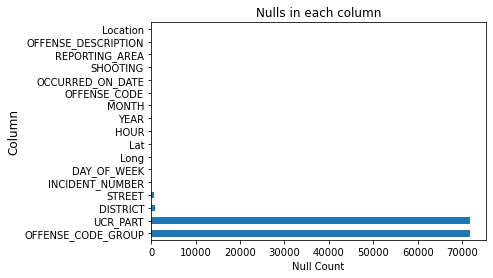

In [6]:
df.isnull().sum().sort_values(ascending=False).plot(kind='barh')
plt.title('Nulls in each column')
plt.xlabel('Null Count')
plt.ylabel('Column',fontsize=12)

- This dataset is having some non significant columns which have no information in it and neither required for the future analysis part. So, we are removing those columns.
- We removed OFFENSE_CODE_GROUP because the whole column consists of null values it will not be useful for the future analysis parts.
- UCR_PART this whole column consists of the null values.

In [7]:
df1 = df.drop(['OFFENSE_CODE_GROUP','Location','UCR_PART','INCIDENT_NUMBER','OFFENSE_CODE','Lat','Long'], axis = 1)
df1.head()

,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,BURGLARY - RESIDENTIAL,B2,289,1,2021-10-13 00:00:00,2021,10,Wednesday,0,SCHROEDER PLZ
1,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,SCHROEDER PLZ
2,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,SCHROEDER PLZ
3,INVESTIGATE PROPERTY,B2,,0,2021-03-29 00:00:00,2021,3,Monday,0,SCHROEDER PLAZA
4,PROPERTY - LOST/ MISSING,E13,465,0,2021-03-22 00:00:00,2021,3,Monday,0,BLUE HILL AVE


- We are going to add the 'Simple Imputer' Class in the pipeline model and set the 'Strategy = most frequent'. 
- So, that it will replace all the missing values in the dataset with the respective columns in the dataset. 
- The above dataset is ready to perform the next steps which include 'EDA', Modeling & Feature Engineering. 

### Exploratory Data Analysis

- Now coming to the EDA part, we are performing distribution on the columns which are having some interesting characteristics shown up.

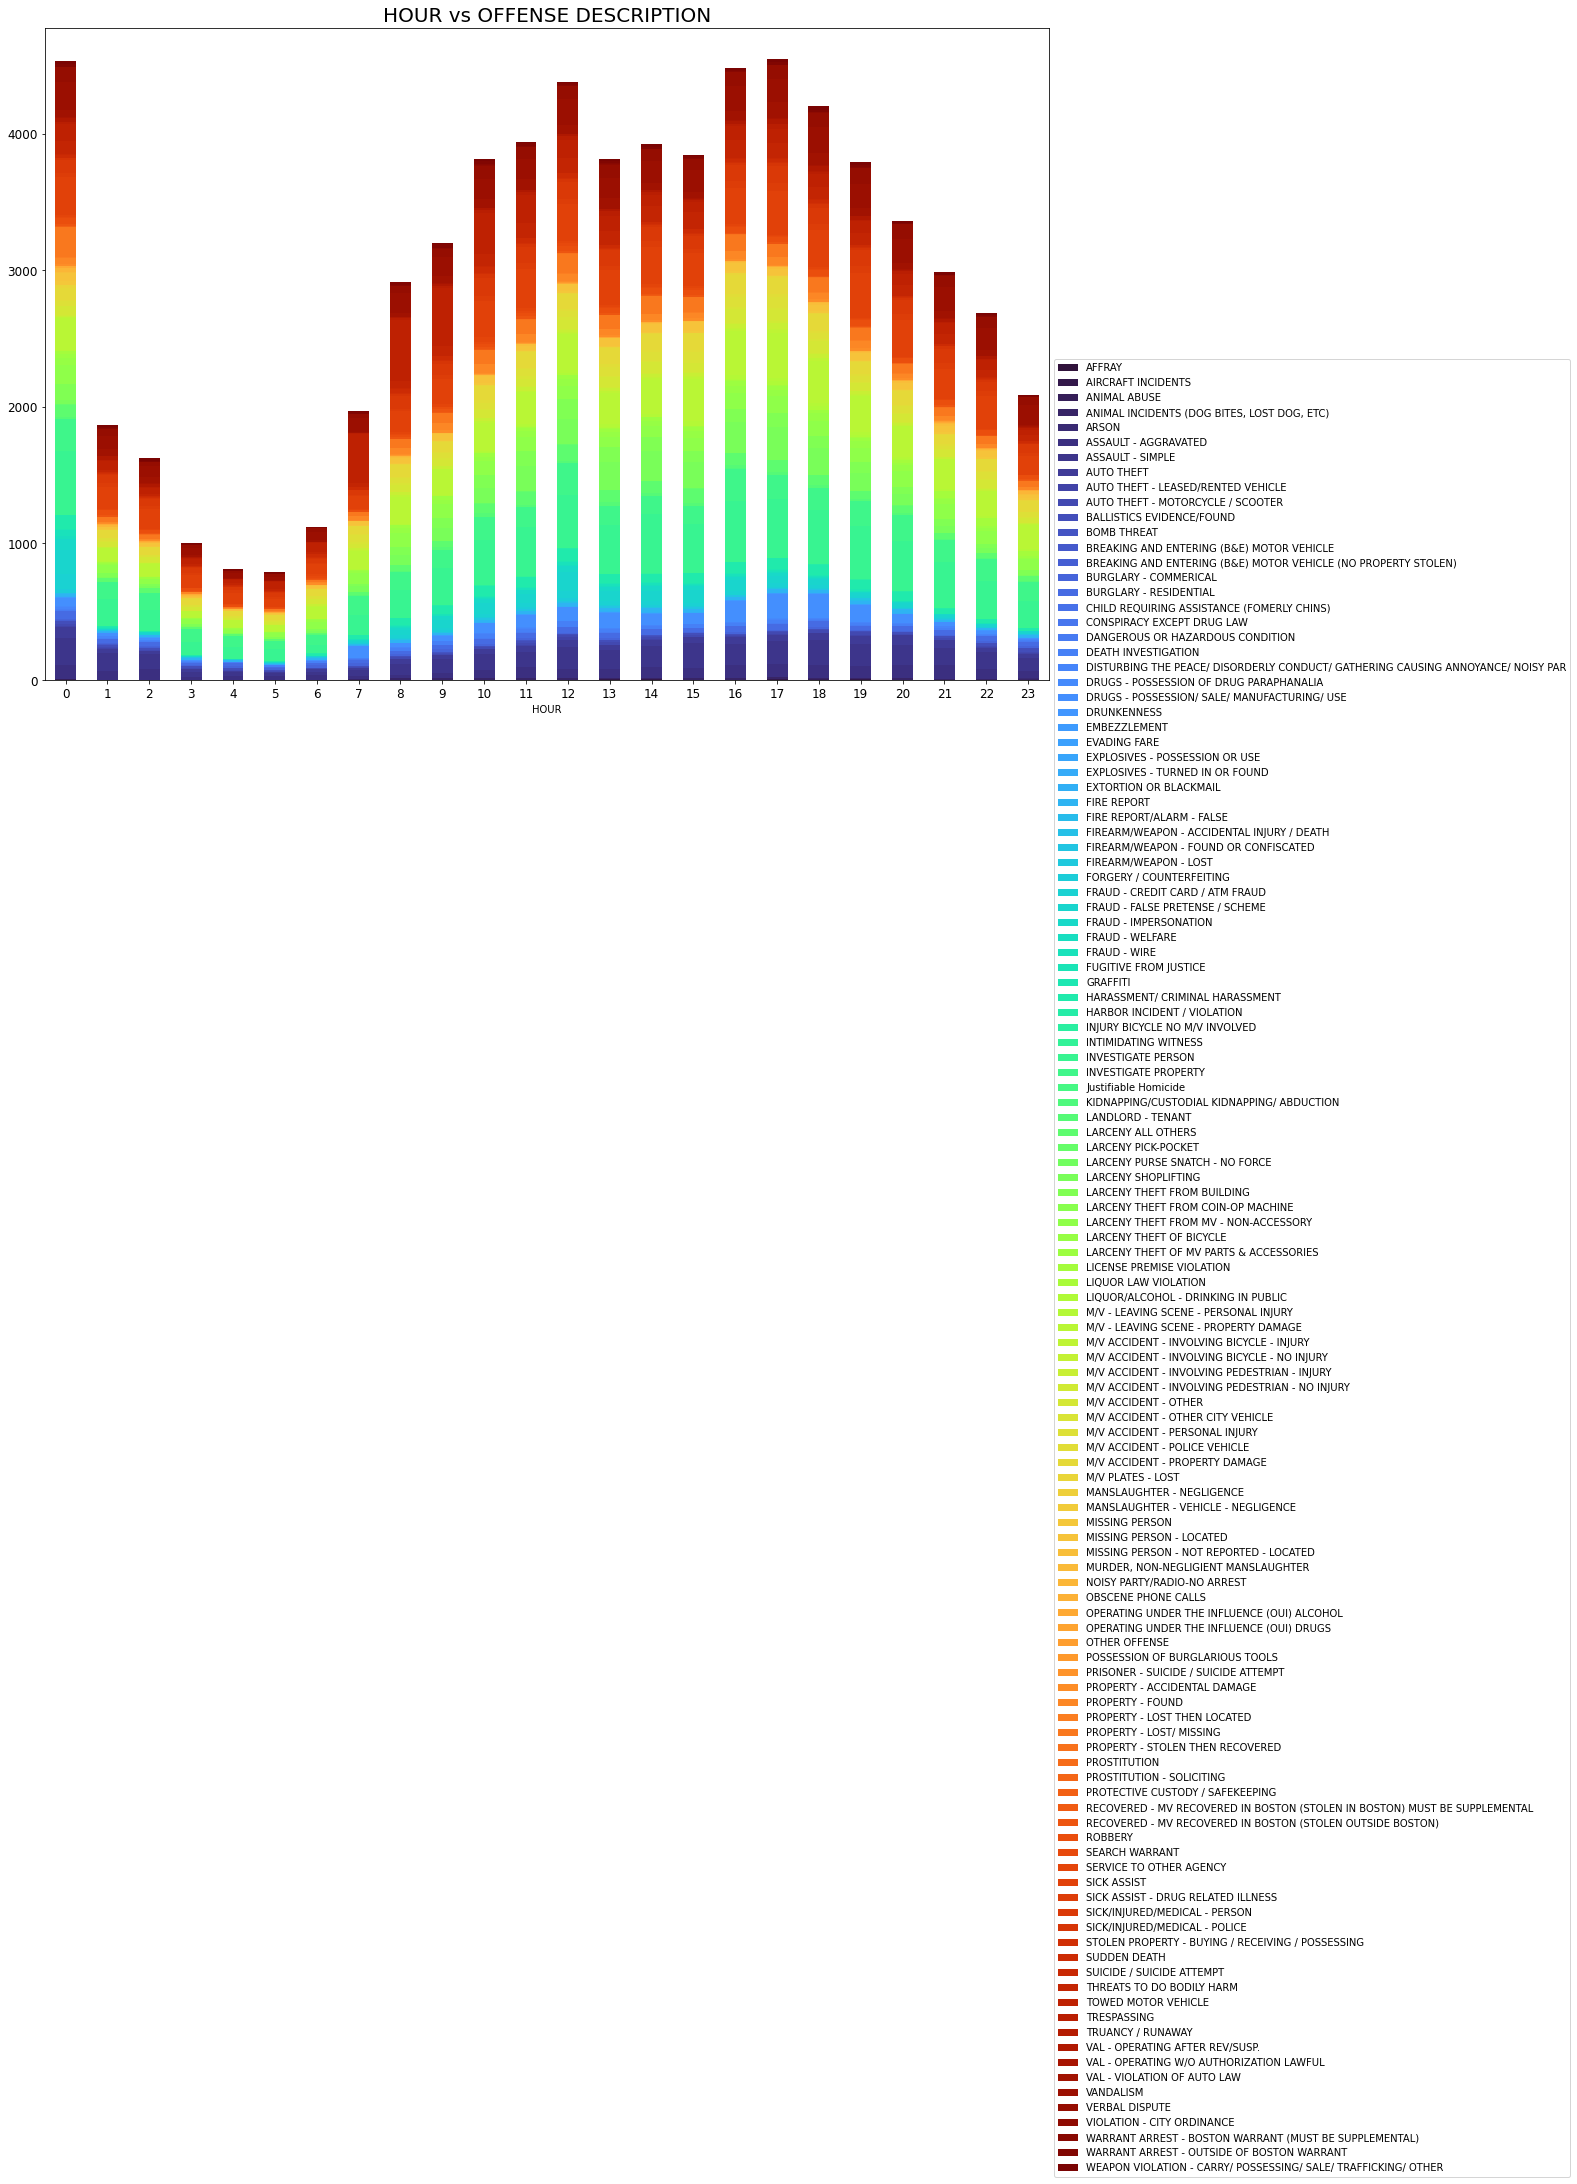

In [8]:
df_cross=pd.crosstab(df1['HOUR'],df1['OFFENSE_DESCRIPTION'])
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df_cross.plot.bar(stacked = True,figsize = (18, 12),colormap='turbo' )
plt.title('HOUR vs OFFENSE DESCRIPTION', fontweight = 30, fontsize = 20)
plt.legend(bbox_to_anchor=(1,0.5),)
plt.xticks(rotation = 0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### HOUR vs OFFENSE DESCRIPTION
- Most of the offenses are took place in the '0' & '17' hours in the midnight and Evening respectively. 

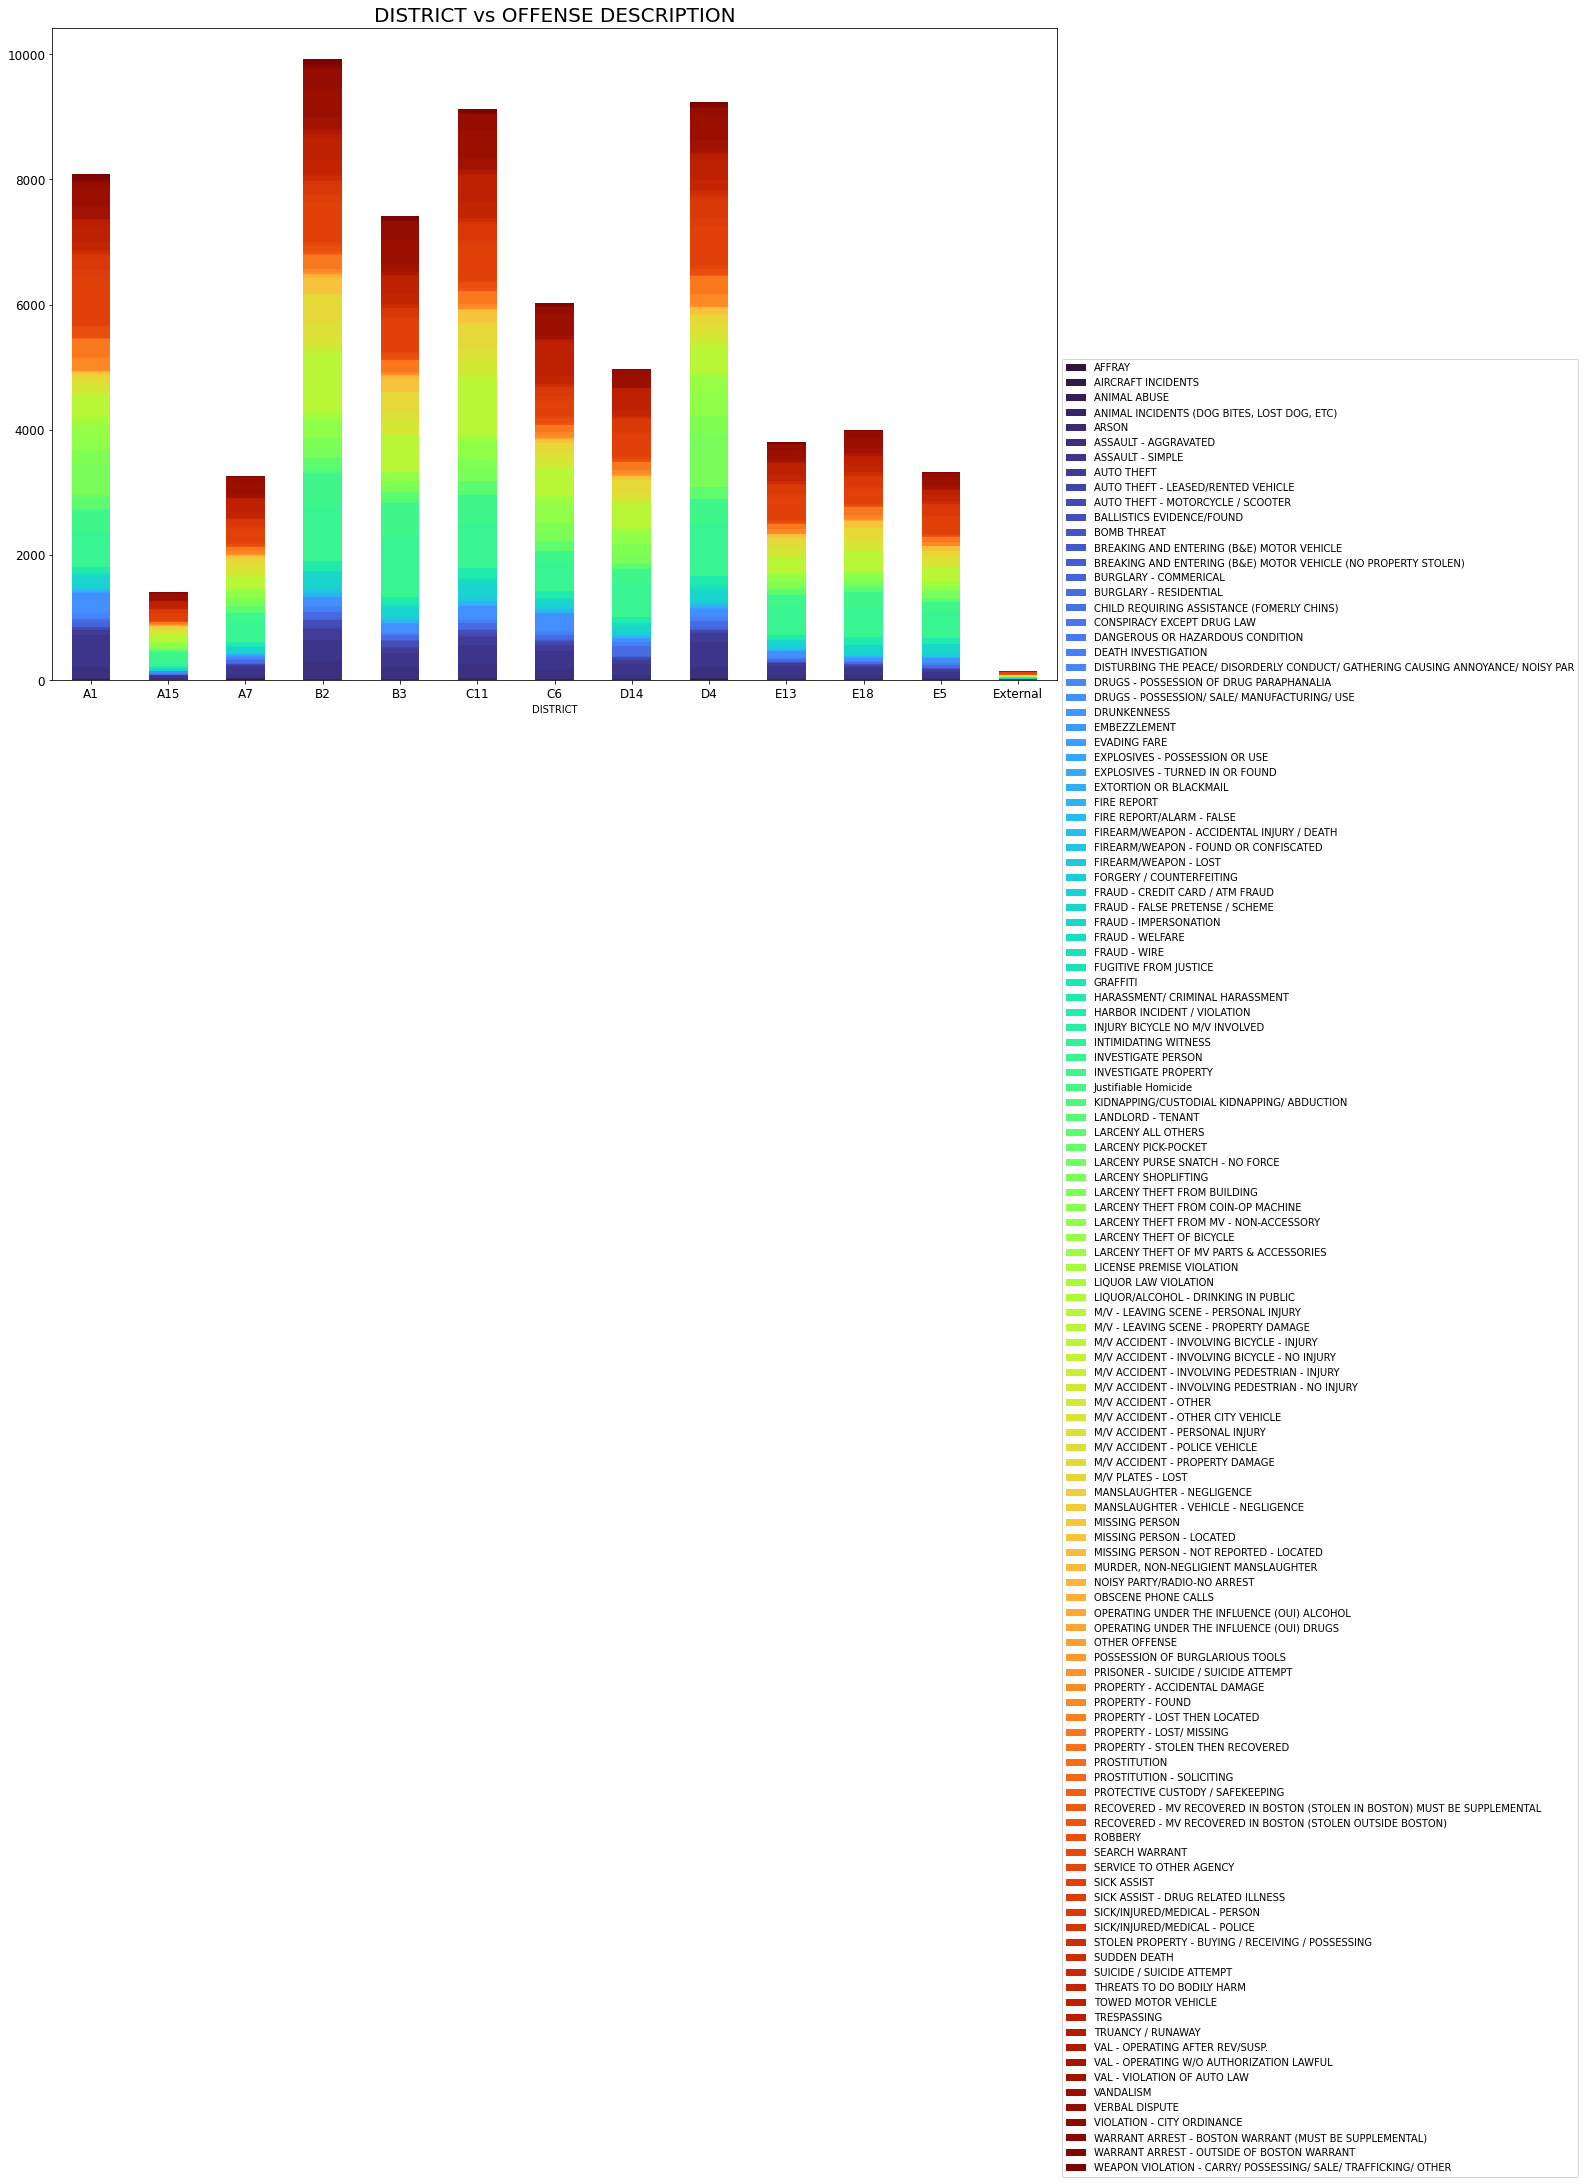

In [9]:
df_cross=pd.crosstab(df1['DISTRICT'],df1['OFFENSE_DESCRIPTION'])
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df_cross.plot.bar(stacked = True,figsize = (18, 12),colormap='turbo' )
plt.title('DISTRICT vs OFFENSE DESCRIPTION', fontweight = 30, fontsize = 20)
plt.legend(bbox_to_anchor=(1,0.5),)
plt.xticks(rotation = 0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### DISTRICT vs OFFENSE DESCRIPTION
- Conidering the 'DISTRICT' & 'OFFENSE_DESCRIPTION' in the dataset, most of the offenses are took place in the 'B2' District.

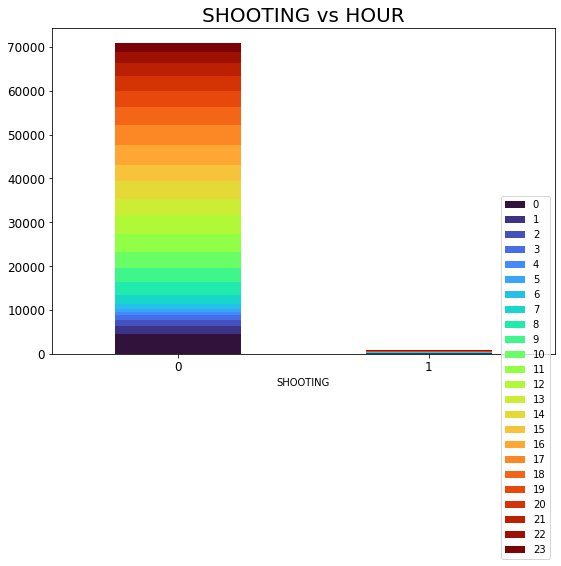

In [10]:
df_cross=pd.crosstab(df1['SHOOTING'],df1['HOUR'])
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df_cross.plot.bar(stacked = True,figsize = (9, 6),colormap='turbo')
plt.title('SHOOTING vs HOUR', fontweight = 30, fontsize = 20)
plt.legend(bbox_to_anchor=(1,0.5),)
plt.xticks(rotation = 0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### SHOOTING vs HOUR
- Most of the shootings are took place in the 12:00 AM midnight.
- To be precise at '0' Hours in the morning.
- Shootings are less involved in the offenses and most of them were handeled without shooting.

In [11]:
df1.groupby('OFFENSE_DESCRIPTION')['HOUR'].mean()

OFFENSE_DESCRIPTION
AFFRAY                                                            13.217391
AIRCRAFT INCIDENTS                                                15.050000
ANIMAL ABUSE                                                      11.444444
ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)                       13.805714
ARSON                                                             14.217391
                                                                    ...    
VERBAL DISPUTE                                                    13.458212
VIOLATION - CITY ORDINANCE                                        12.189655
WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL)            11.447761
WARRANT ARREST - OUTSIDE OF BOSTON WARRANT                        11.546875
WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER    12.248344
Name: HOUR, Length: 121, dtype: float64

In [12]:
df1.groupby('OFFENSE_DESCRIPTION')['HOUR'].median()

OFFENSE_DESCRIPTION
AFFRAY                                                            15.0
AIRCRAFT INCIDENTS                                                17.0
ANIMAL ABUSE                                                      12.5
ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)                       14.0
ARSON                                                             18.0
                                                                  ... 
VERBAL DISPUTE                                                    14.0
VIOLATION - CITY ORDINANCE                                        12.5
WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL)            11.0
WARRANT ARREST - OUTSIDE OF BOSTON WARRANT                        11.0
WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER    14.0
Name: HOUR, Length: 121, dtype: float64

# Modeling

- Categorizing the Target Variable into three classes to ease the regression models
- As mentioned Below a day is divided into three classes which are 'DAY', 'NIGHT' & 'MIDNIGHT'.
- The main reason to consider 'NIGHT' & 'MIDNIGHT' are most of the crimes are happening in the time of 23 to 4 in the morning.

In [13]:
df1['Time of Day'] = ['DAY' if 6<=x<=18 else 'NIGHT' if 18<x<23 else 'MIDNIGHT' for x in df1['HOUR']]
df1.head(10)

,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Time of Day
0,BURGLARY - RESIDENTIAL,B2,289,1,2021-10-13 00:00:00,2021,10,Wednesday,0,SCHROEDER PLZ,MIDNIGHT
1,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,SCHROEDER PLZ,MIDNIGHT
2,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,SCHROEDER PLZ,MIDNIGHT
3,INVESTIGATE PROPERTY,B2,,0,2021-03-29 00:00:00,2021,3,Monday,0,SCHROEDER PLAZA,MIDNIGHT
4,PROPERTY - LOST/ MISSING,E13,465,0,2021-03-22 00:00:00,2021,3,Monday,0,BLUE HILL AVE,MIDNIGHT
5,VERBAL DISPUTE,C11,347,0,2021-07-28 20:45:00,2021,7,Wednesday,20,LYON ST,NIGHT
6,M/V ACCIDENT - OTHER,A1,,0,2021-11-02 13:23:00,2021,11,Tuesday,13,CAMBRIDGE ST & BOWDOIN ST\nBOSTON MA 02114\nU...,DAY
7,LARCENY THEFT FROM BUILDING,E13,,0,2021-12-30 12:30:00,2021,12,Thursday,12,MONTEBELLO RD,DAY
8,FRAUD - CREDIT CARD / ATM FRAUD,B2,282,0,2021-12-29 22:40:00,2021,12,Wednesday,22,WASHINGTON ST,NIGHT
9,FRAUD - FALSE PRETENSE / SCHEME,A1,98,0,2021-11-23 00:00:00,2021,11,Tuesday,0,MILK ST,MIDNIGHT


### Pipeline Construction & Feature Engineering

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_vars = ['DISTRICT','DAY_OF_WEEK','STREET','OFFENSE_DESCRIPTION']
num_vars = ['SHOOTING', 'YEAR','MONTH']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='most_frequent')),('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['SHOOTING', 'YEAR', 'MONTH']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['DISTRICT', 'DAY_OF_WEEK', 'STREET',
                                  'OFFENSE_DESCRIPTION'])])


- I've taken the classified columns and the numeric columns and turned them into pipelines one after another. 
- I utilized the 'median' imputing approach for numerical pipelines and the'most_frequent' method for categorical pipelines.
- I've put them to use in the creation of a processing pipeline.

In [19]:
from sklearn.model_selection import train_test_split
features = [x for x in df1.columns if (x != 'Time of Day')]

X = df1[features]
y = df1['Time of Day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Training data: {X_train.shape[0]:,}')
print(f'Test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Training data: 57,376
Test data: 14,345

Features:
OFFENSE_DESCRIPTION
DISTRICT
REPORTING_AREA
SHOOTING
OCCURRED_ON_DATE
YEAR
MONTH
DAY_OF_WEEK
HOUR
STREET


#### Splitting the Dataset
- By splitting the datasets into two categories testing & Training.
- Considering the 'HOUR' Column in the dataset, We have created a new column which is 'Time of day'.

In [20]:
cat_pipeline.fit(X_train,y_train)

Pipeline(steps=[('impute_missing', SimpleImputer(strategy='most_frequent')),
                ('create_dummies_cats',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

- Here we are just checking whether the categorical pipeline is fitting to trainig data.

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear'))
             ])
#NOTE
#L2 penalty function uses the sum of the squares of the parameters and Ridge Regression encourages this sum to be small
params = {'model__C': [5,10,20],'model__penalty':['l2','none']}

grid_search = GridSearchCV(modeling_pipeline, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['SHOOTING', 'YEAR',
                                                   'MONTH']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                

In [22]:
logistic_regression_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in logistic_regression_results:
    x = i[0]['model__C']
    y = i[0]['model__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 5, lower acc: 53.59%, mean acc:53.90%, upper acc: 54.20%
No Regularization:, lower acc: nan%, mean acc: nan%, upper acc: nan%
Regularization: 10, lower acc: 53.49%, mean acc:53.87%, upper acc: 54.26%
Regularization: 20, lower acc: 53.45%, mean acc:53.83%, upper acc: 54.20%


In [23]:
y = modeling_pipeline.fit(X_train,y_train)
y_testPre = modeling_pipeline.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, y_testPre))
y_trainPre = modeling_pipeline.predict(X_train)
print("Training Scores:: Classification Report:\n")
print(classification_report(y_train, y_trainPre))

Testing Scores:: Classification Report:

              precision    recall  f1-score   support

         DAY       0.66      0.98      0.79      9224
    MIDNIGHT       0.48      0.06      0.11      2499
       NIGHT       0.37      0.03      0.05      2622

    accuracy                           0.65     14345
   macro avg       0.50      0.36      0.32     14345
weighted avg       0.57      0.65      0.53     14345

Training Scores:: Classification Report:

              precision    recall  f1-score   support

         DAY       0.66      0.99      0.79     36953
    MIDNIGHT       0.62      0.09      0.16     10217
       NIGHT       0.62      0.04      0.08     10206

    accuracy                           0.66     57376
   macro avg       0.63      0.37      0.34     57376
weighted avg       0.65      0.66      0.55     57376



### Secondary Results for Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
modeling_pipeline = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear'))
             ])

params = {'model__C': [8,9,10,11],'model__penalty':['l2','none']}
grid_search = GridSearchCV(modeling_pipeline, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)
start_time = time.time()
print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')
print("--- %s seconds ---" % (time.time() - start_time))

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['SHOOTING', 'YEAR',
                                                   'MONTH']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                

- Constructing the pipeline for this particular model.
- Using l2, None penalty methods in the params. Because L2 penalty function uses the sum of the squares of the parameters and Ridge Regression encourages this sum to be small
- Grid search gives us the ability to search over specified values for each of the parameters listed above. We do this by passing GridSearchCV a dictionary with parameter names as keys, and lists of values to try as arguments for those parameters.

In [26]:
logistic_regression_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in logistic_regression_results:
    x = i[0]['model__C']
    y = i[0]['model__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 8, lower acc: 53.53%, mean acc:53.90%, upper acc: 54.27%
No Regularization:, lower acc: nan%, mean acc: nan%, upper acc: nan%
Regularization: 9, lower acc: 53.51%, mean acc:53.89%, upper acc: 54.26%
Regularization: 10, lower acc: 53.49%, mean acc:53.87%, upper acc: 54.26%
Regularization: 11, lower acc: 53.49%, mean acc:53.88%, upper acc: 54.26%


- By performing hyperparameter searches, we will get the best values where the validations score are good to taken and implemented in secondary search results on the regression model.

In [27]:
y = modeling_pipeline.fit(X_train,y_train)
y_testPre = modeling_pipeline.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, y_testPre))
y_trainPre = modeling_pipeline.predict(X_train)
print("Training Scores:: Classification Report:\n")
print(classification_report(y_train, y_trainPre))

Testing Scores:: Classification Report:

              precision    recall  f1-score   support

         DAY       0.66      0.98      0.79      9224
    MIDNIGHT       0.48      0.06      0.11      2499
       NIGHT       0.37      0.03      0.05      2622

    accuracy                           0.65     14345
   macro avg       0.50      0.36      0.32     14345
weighted avg       0.57      0.65      0.53     14345

Training Scores:: Classification Report:

              precision    recall  f1-score   support

         DAY       0.66      0.99      0.79     36953
    MIDNIGHT       0.62      0.09      0.16     10217
       NIGHT       0.62      0.04      0.08     10206

    accuracy                           0.66     57376
   macro avg       0.63      0.37      0.34     57376
weighted avg       0.65      0.66      0.55     57376



- After this we will get the classification reports of both Testing & training.

### ROC-AUC Curve for Logistic Regression

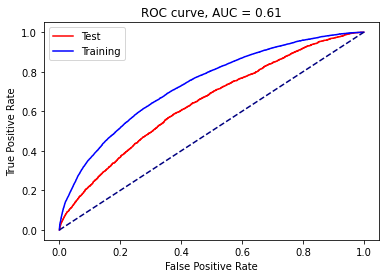

In [29]:
y_testprobability = modeling_pipeline.predict_proba(X_test)
y_trainprobability = modeling_pipeline.predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob, pos_label = 'MIDNIGHT')
    return fpr, tpr
fpr_test, tpr_test = roc(y_test, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train, y_trainprobability[:,1])

# Area Under Curve
auc = roc_auc_score(y_test, y_testprobability, multi_class = 'ovo')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

- By performing ROC & area under curve on the regression model we got around 0.61 of AUC.

### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_p = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', DecisionTreeClassifier())
             ])

params = {'model__max_depth': [10,50,100], 'model__min_samples_split' : [0.001,0.01,0.1]}

grid_search = GridSearchCV(dt_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['SHOOTING', 'YEAR',
                                                   'MONTH']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                

### Hyperparameter search

- Using custom model__max_depth and model__min_sample_split values, we will find the right parameters for better validation scores
- Grid search gives us the ability to search over specified values for each of the parameters listed above. We do this by passing GridSearchCV a dictionary with parameter names as keys, and lists of values to try as arguments for those parameters.

In [33]:
dt_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

for i in dt_results:
    x = i[0]['model__max_depth']
    y = i[0]['model__min_samples_split']
    print(f'Depth/Min Split: {x}, {y:.2%}: {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

Depth/Min Split: 10, 0.10%: 52.17% < 52.50% > 52.83%
Depth/Min Split: 10, 1.00%: 51.73% < 52.02% > 52.31%
Depth/Min Split: 10, 10.00%: 51.88% < 52.09% > 52.30%
Depth/Min Split: 50, 0.10%: 53.55% < 53.89% > 54.23%
Depth/Min Split: 50, 1.00%: 52.59% < 52.85% > 53.12%
Depth/Min Split: 50, 10.00%: 52.03% < 52.27% > 52.51%
Depth/Min Split: 100, 0.10%: 53.85% < 54.24% > 54.62%
Depth/Min Split: 100, 1.00%: 52.88% < 53.12% > 53.36%
Depth/Min Split: 100, 10.00%: 52.07% < 52.32% > 52.57%


In [34]:
decision_model = Pipeline([('processing_pipeline', processing_pipeline),
                           ('model', DecisionTreeClassifier(max_depth=100, min_samples_split=0.10))])

In [35]:
y = decision_model.fit(X_train,y_train)
decision_predict = decision_model.predict(X_test)
print(classification_report(y_test, decision_predict))
y_trainPre = decision_model.predict(X_train)
print("Training Scores:: Classification Report:\n")
print(classification_report(y_train, y_trainPre))

              precision    recall  f1-score   support

         DAY       0.65      0.99      0.79      9224
    MIDNIGHT       0.49      0.04      0.08      2499
       NIGHT       0.37      0.01      0.02      2622

    accuracy                           0.65     14345
   macro avg       0.50      0.35      0.30     14345
weighted avg       0.57      0.65      0.52     14345

Training Scores:: Classification Report:

              precision    recall  f1-score   support

         DAY       0.65      0.99      0.79     36953
    MIDNIGHT       0.46      0.04      0.08     10217
       NIGHT       0.67      0.02      0.04     10206

    accuracy                           0.65     57376
   macro avg       0.60      0.35      0.30     57376
weighted avg       0.62      0.65      0.53     57376



### Secondary Results for Decision tree Classifier

- By performing hyperparameter searches, we will get the best values where the validations score are good to taken and implemented in secondary search results on the regression model.

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_p = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', DecisionTreeClassifier())
             ])

params = {'model__max_depth': [90,100,110], 'model__min_samples_split' : [0.01,0.10, 0.3]}

grid_search = GridSearchCV(dt_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['SHOOTING', 'YEAR',
                                                   'MONTH']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                

- Constructing the pipeline for this particular model.
- Using custom model__max_depth and model__min_sample_split values, we will find the right parameters for better validation scores

### Hyperparameter Search for secondary results

In [37]:
dt_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

for i in dt_results:
    x = i[0]['model__max_depth']
    y = i[0]['model__min_samples_split']
    print(f'Depth/Min Split: {x}, {y:.2%}: {(i[1]-i[2]):.2%} < {i[1]:.2%} > {(i[1]+i[2]):.2%}')

Depth/Min Split: 90, 1.00%: 52.79% < 53.06% > 53.33%
Depth/Min Split: 90, 10.00%: 52.05% < 52.32% > 52.58%
Depth/Min Split: 90, 30.00%: 51.75% < 51.94% > 52.13%
Depth/Min Split: 100, 1.00%: 52.83% < 53.08% > 53.32%
Depth/Min Split: 100, 10.00%: 52.07% < 52.33% > 52.58%
Depth/Min Split: 100, 30.00%: 51.75% < 51.94% > 52.13%
Depth/Min Split: 110, 1.00%: 52.88% < 53.13% > 53.38%
Depth/Min Split: 110, 10.00%: 52.10% < 52.34% > 52.57%
Depth/Min Split: 110, 30.00%: 51.75% < 51.94% > 52.13%


- Grid search gives us the ability to search over specified values for each of the parameters listed above. We do this by passing GridSearchCV a dictionary with parameter names as keys, and lists of values to try as arguments for those parameters.
- By performing hyperparameter searches, we will get the best values where the validations score are good to taken and implemented in secondary search results on the regression model.

In [38]:
decision_model = Pipeline([('processing_pipeline', processing_pipeline),
                           ('model', DecisionTreeClassifier(max_depth=110, min_samples_split=1.0))])

In [39]:
y = decision_model.fit(X_train,y_train)
decision_predict = decision_model.predict(X_test)
print(classification_report(y_test, decision_predict))
y_trainPre = decision_model.predict(X_train)
print("Training Scores:: Classification Report:\n")
print(classification_report(y_train, y_trainPre))

              precision    recall  f1-score   support

         DAY       0.65      1.00      0.79      9224
    MIDNIGHT       0.48      0.03      0.06      2499
       NIGHT       0.00      0.00      0.00      2622

    accuracy                           0.65     14345
   macro avg       0.38      0.34      0.28     14345
weighted avg       0.50      0.65      0.52     14345

Training Scores:: Classification Report:

              precision    recall  f1-score   support

         DAY       0.65      0.99      0.79     36953
    MIDNIGHT       0.41      0.03      0.05     10217
       NIGHT       0.00      0.00      0.00     10206

    accuracy                           0.65     57376
   macro avg       0.35      0.34      0.28     57376
weighted avg       0.49      0.65      0.52     57376



- After this we will get the classification reports of both Testing & training. Accuracy is 65%
- By performing ROC & area under curve on the regression model we got around 0.51 of AUC.

### ROC-AUC Curve for Decision Tree Classifier

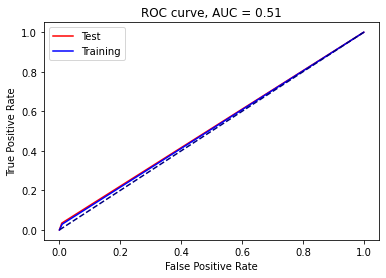

In [40]:
y_testprobability = decision_model.predict_proba(X_test)
y_trainprobability = decision_model.predict_proba(X_train)
def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob, pos_label = 'MIDNIGHT')
    return fpr, tpr
fpr_test, tpr_test = roc(y_test, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train, y_trainprobability[:,1])

#Area Under Curve
auc = roc_auc_score(y_test, y_testprobability, multi_class = 'ovo')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve, AUC = %.2f'%auc)

plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

### KNN - Classifier

In [41]:
pipeline_knn=Pipeline([('processing_pipeline', processing_pipeline),('knn_classifier',KNeighborsClassifier())])

In [42]:
param_knn = {'knn_classifier__n_neighbors':[40,60,100]}
results_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_knn, scoring='accuracy', refit=True, cv=5)
results_knn = results_knn.fit(X_train, y_train)
print(f'\033[1mThis model seems to be best for classification when hyperparameter number of neighbors are {results_knn.best_params_["knn_classifier__n_neighbors"]}')
y_predict = results_knn.predict(X_test)
results_knn.score(X_test,y_test)
print(f'\033[1mThe accuracy of KNN classifier is {results_knn.score(X_test,y_test)}')

This model seems to be best for classification when hyperparameter number of neighbors are 60
The accuracy of KNN classifier is 0.6480306727082608


### secondary Results

In [43]:
param_knn = {'knn_classifier__n_neighbors':[50,60,70]}
results_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_knn, scoring='accuracy', refit=True, cv=5)
results_knn = results_knn.fit(X_train, y_train)
print(f'\033[1mThis model seems to be best for classification when hyperparameter number of neighbors are {results_knn.best_params_["knn_classifier__n_neighbors"]}')
y_predict = results_knn.predict(X_test)
results_knn.score(X_test,y_test)
print(f'\033[1mThe accuracy of KNN classifier is {results_knn.score(X_test,y_test)}')

This model seems to be best for classification when hyperparameter number of neighbors are 60
The accuracy of KNN classifier is 0.6480306727082608


- Constructing the pipeline for this particular model.
- This model seems to be best for classification when hyperparameter number of neighbors are 60The accuracy of KNN classifier is 0.6480306727082608
- Even after taking the closet values compared with the above value we are still getting the same value in params.

### ROC-AUC Curve for KNN

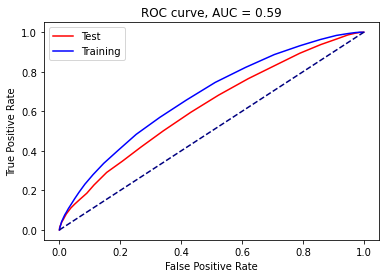

In [44]:
y_testprobability = results_knn.predict_proba(X_test)
y_trainprobability = results_knn.predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob, pos_label = 'MIDNIGHT')
    return fpr, tpr
fpr_test, tpr_test = roc(y_test, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train, y_trainprobability[:,1])

# Area Under Cuve
auc = roc_auc_score(y_test, y_testprobability, multi_class = 'ovo')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

- By performing ROC & area under curve on the regression model we got around 0.59 of AUC.

#### Conclusion

- Considering the three machine learning models, the Decision tree model shows the highest accuracy even though compared with the remaining models they are similar in their accuracy. Accuracy can be increased by using better modeling techniques.
